# Fire

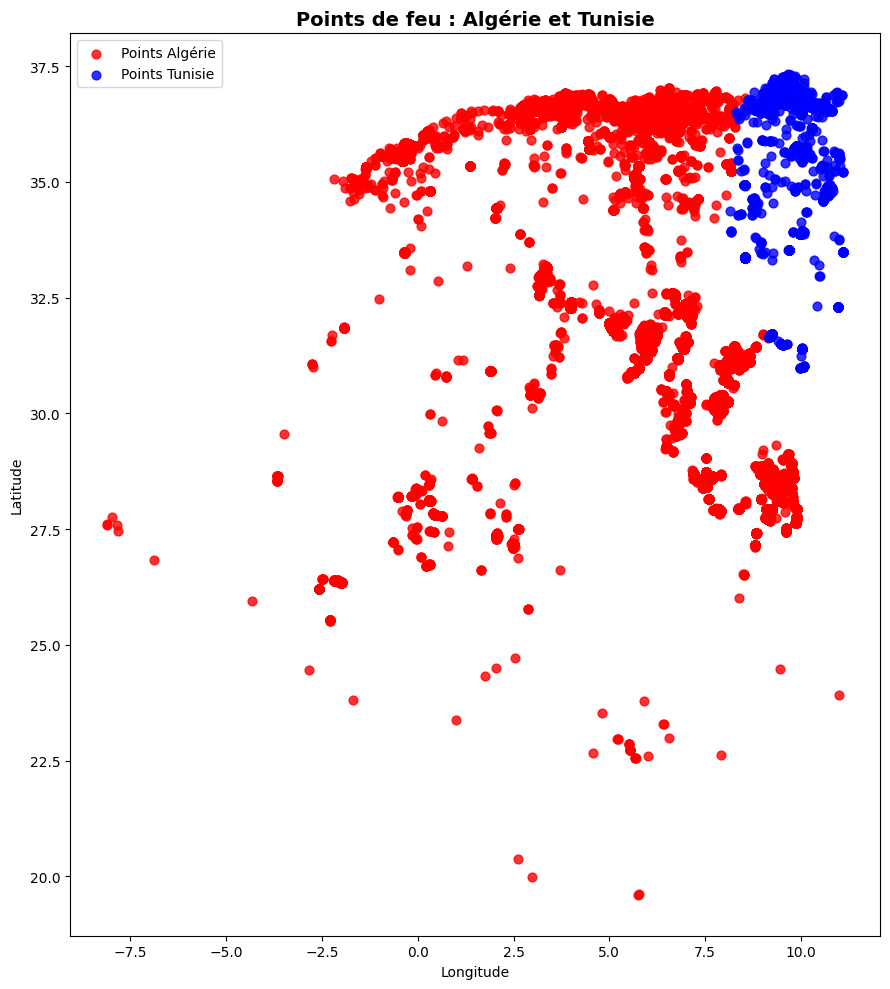

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# les fichiers de fire
df_points1 = pd.read_csv("/content/drive/MyDrive/data_set/fire/viirs-jpss1_2024_Algeria.csv")
df_points2 = pd.read_csv("/content/drive/MyDrive/data_set/fire/viirs-jpss1_2024_Tunisia.csv")

geometry1 = [Point(xy) for xy in zip(df_points1['longitude'], df_points1['latitude'])]
geometry2 = [Point(xy) for xy in zip(df_points2['longitude'], df_points2['latitude'])]

gdf_points1 = gpd.GeoDataFrame(df_points1, geometry=geometry1, crs="EPSG:4326")
gdf_points2 = gpd.GeoDataFrame(df_points2, geometry=geometry2, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(12, 10))
gdf_points1.plot(ax=ax, color='red', markersize=40, alpha=0.8, label='Points Algérie')
gdf_points2.plot(ax=ax, color='blue', markersize=40, alpha=0.8, label='Points Tunisie')
ax.set_title("Points de feu : Algérie et Tunisie", fontsize=14, fontweight="bold")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()

# Contour


/tmp/ipython-input-2120979664.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
/tmp/ipython-input-2120979664.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


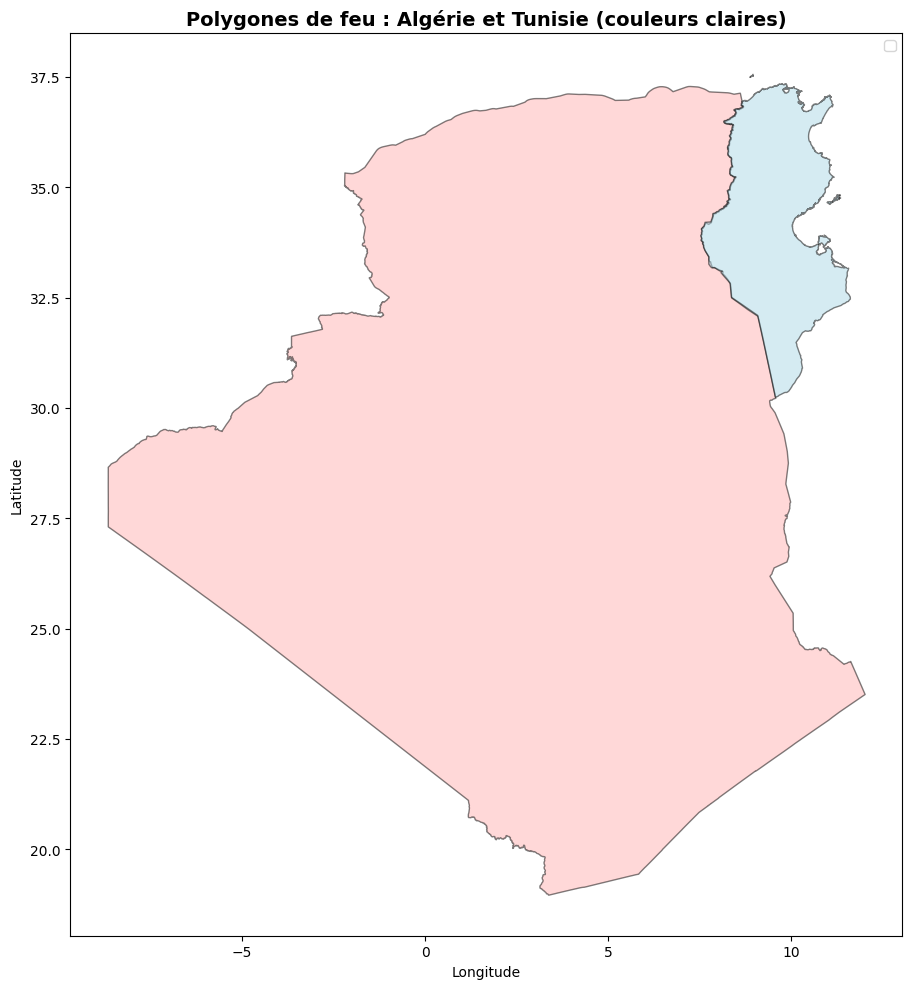

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# les fichiers de conteurs
gdf1 = gpd.read_file("/content/drive/MyDrive/data_set/kontur/kontur_boundaries_DZ/algeria.geojson")
gdf2 = gpd.read_file("/content/drive/MyDrive/data_set/kontur/kontur_boundaris_TUN/Tunisie.geojson")

fig, ax = plt.subplots(figsize=(12, 10))
gdf1.plot(ax=ax, color='#FFB3B3', edgecolor='black', alpha=0.5, label='Algérie')  # rouge clair
gdf2.plot(ax=ax, color='#ADD8E6', edgecolor='black', alpha=0.5, label='Tunisie')  # bleu clair
ax.set_title("Polygones de : Algérie et Tunisie)", fontsize=14, fontweight="bold")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()

# Land cover

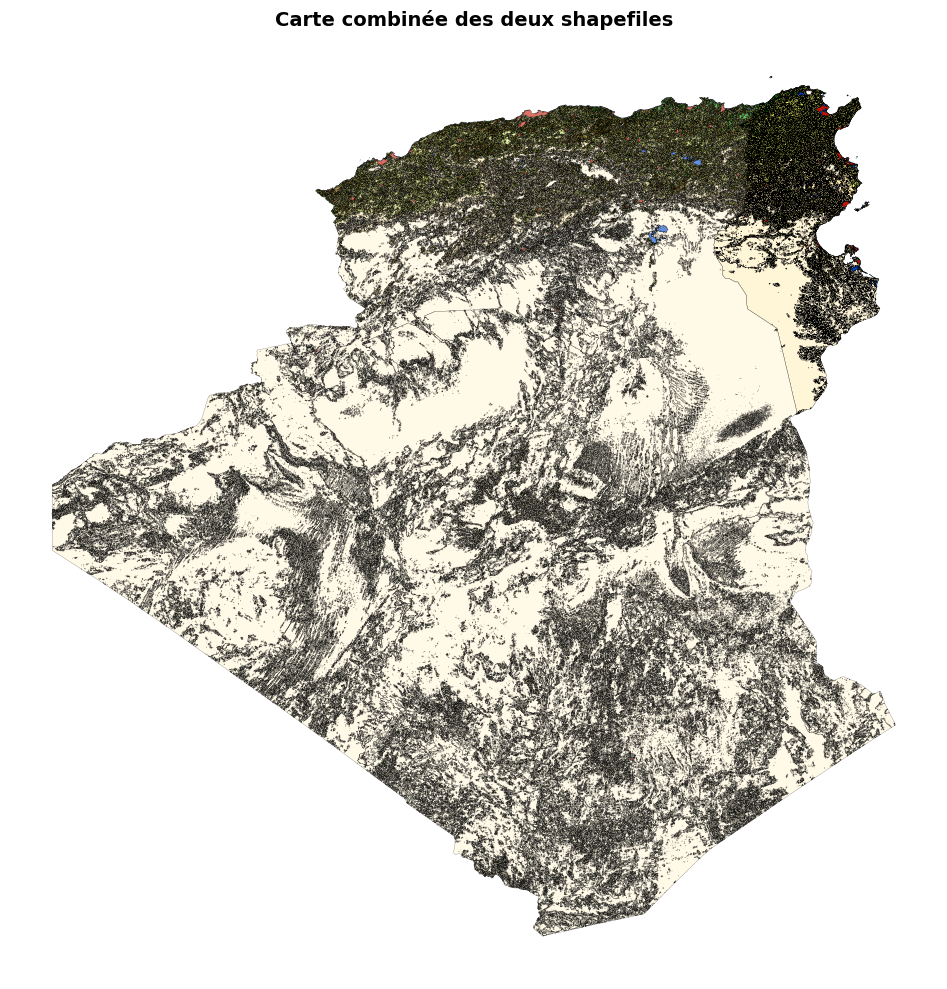

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

#Charger la légende commune
legend = pd.read_excel("/content/drive/MyDrive/data_set/landcover/land_cover_dzd/globcover_legend.xls", sheet_name='Regional')
legend.columns = [c.strip().capitalize() for c in legend.columns]
for c in ['Red', 'Green', 'Blue']:
    legend[c] = legend[c].fillna(0).astype(int)
legend['color'] = legend.apply(lambda x: f'#{x.Red:02X}{x.Green:02X}{x.Blue:02X}', axis=1)
legend["Value"] = legend["Value"].astype(int, errors='ignore')



# land cover tunisia
gdf1 = gpd.read_file("/content/drive/MyDrive/data_set/landcover/land_cover_tun/tun_gc_adg.shp")
gdf1["GRIDCODE"] = gdf1["GRIDCODE"].astype(int, errors='ignore')
gdf1_merged = gdf1.merge(legend, left_on="GRIDCODE", right_on="Value", how="left")
gdf1_merged["color"] = gdf1_merged["color"].fillna("#D3D3D3")  # gris clair pour les valeurs non classées

#land cover algeria
gdf2 = gpd.read_file("/content/drive/MyDrive/data_set/landcover/land_cover_dzd/dza_gc_adg.shp")
gdf2["GRIDCODE"] = gdf2["GRIDCODE"].astype(int, errors='ignore')
gdf2_merged = gdf2.merge(legend, left_on="GRIDCODE", right_on="Value", how="left")
gdf2_merged["color"] = gdf2_merged["color"].fillna("#D3D3D3")

#Affichage des deux shapefiles sur le même axe
fig, ax = plt.subplots(figsize=(12, 10))
gdf1_merged.plot(ax=ax, color=gdf1_merged["color"], edgecolor="black", linewidth=0.2)
gdf2_merged.plot(ax=ax, color=gdf2_merged["color"], edgecolor="black", linewidth=0.2, alpha=0.6)

ax.set_title("Carte combinée des deux landcover", fontsize=14, fontweight="bold")
ax.set_axis_off()

plt.tight_layout()
plt.show()

# ELevation

In [ ]:
!pip install rasterio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 120.3 MB/s eta 0:00:00


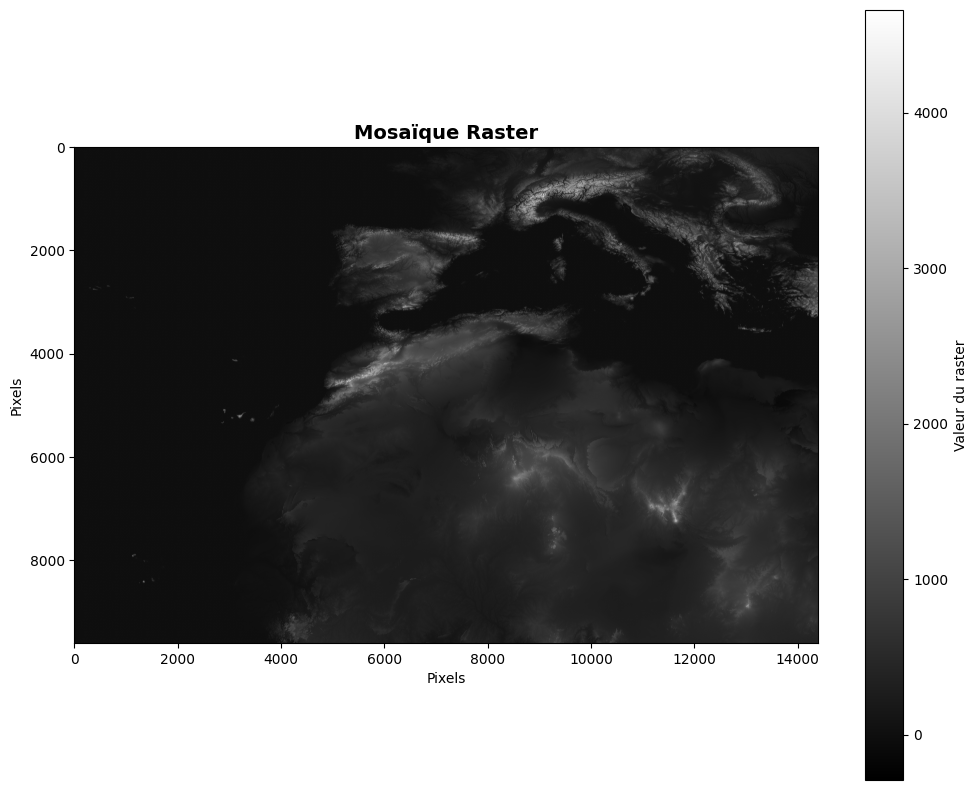

Mosaïque sauvegardée ici : /content/drive/MyDrive/data_set/landcover/Elevation/global_elevation.tif


In [ ]:
import rasterio
from rasterio.merge import merge
import matplotlib.pyplot as plt

tif_files = [
    "/content/drive/MyDrive/data_set/Elevation/GMTED2010N10E000_150/10n000e_20101117_gmted_mea150.tif",
    "/content/drive/MyDrive/data_set/Elevation/GMTED2010N10W030_150/10n030w_20101117_gmted_mea150.tif",
    "/content/drive/MyDrive/data_set/Elevation/GMTED2010N30E000_150/30n000e_20101117_gmted_mea150.tif",
    "/content/drive/MyDrive/data_set/Elevation/GMTED2010N30W030_150/30n030w_20101117_gmted_mea150.tif"
]

rasters = [rasterio.open(f) for f in tif_files]

mosaic, out_trans = merge(rasters)
fig, ax = plt.subplots(figsize=(12, 10))
# Si raster simple bande
plt.imshow(mosaic[0], cmap='gray')  # mosaïque[0] car merge retourne un array 3D (bandes, lignes, colonnes)
plt.title("Mosaïque Raster", fontsize=14, fontweight="bold")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.colorbar(label="Valeur du raster")
plt.show()
out_meta = rasters[0].meta.copy()
out_meta.update({
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans
})

output_path = "/content/drive/MyDrive/data_set/landcover/Elevation/global_elevation.tif"
with rasterio.open(output_path, "w", **out_meta) as dest:
    dest.write(mosaic)

print("Mosaïque sauvegardée ici :", output_path)

# Soil

In [ ]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

raster_path = "/content/drive/MyDrive/data_set_old/soil_type/HWSD2.bil"
raster = rasterio.open(raster_path)
fig, ax = plt.subplots(figsize=(10, 8))
show(raster, ax=ax, cmap='terrain')
ax.set_title("Image raster", fontsize=14, fontweight="bold")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


la session plante - visualisation apres clipping

# Climate

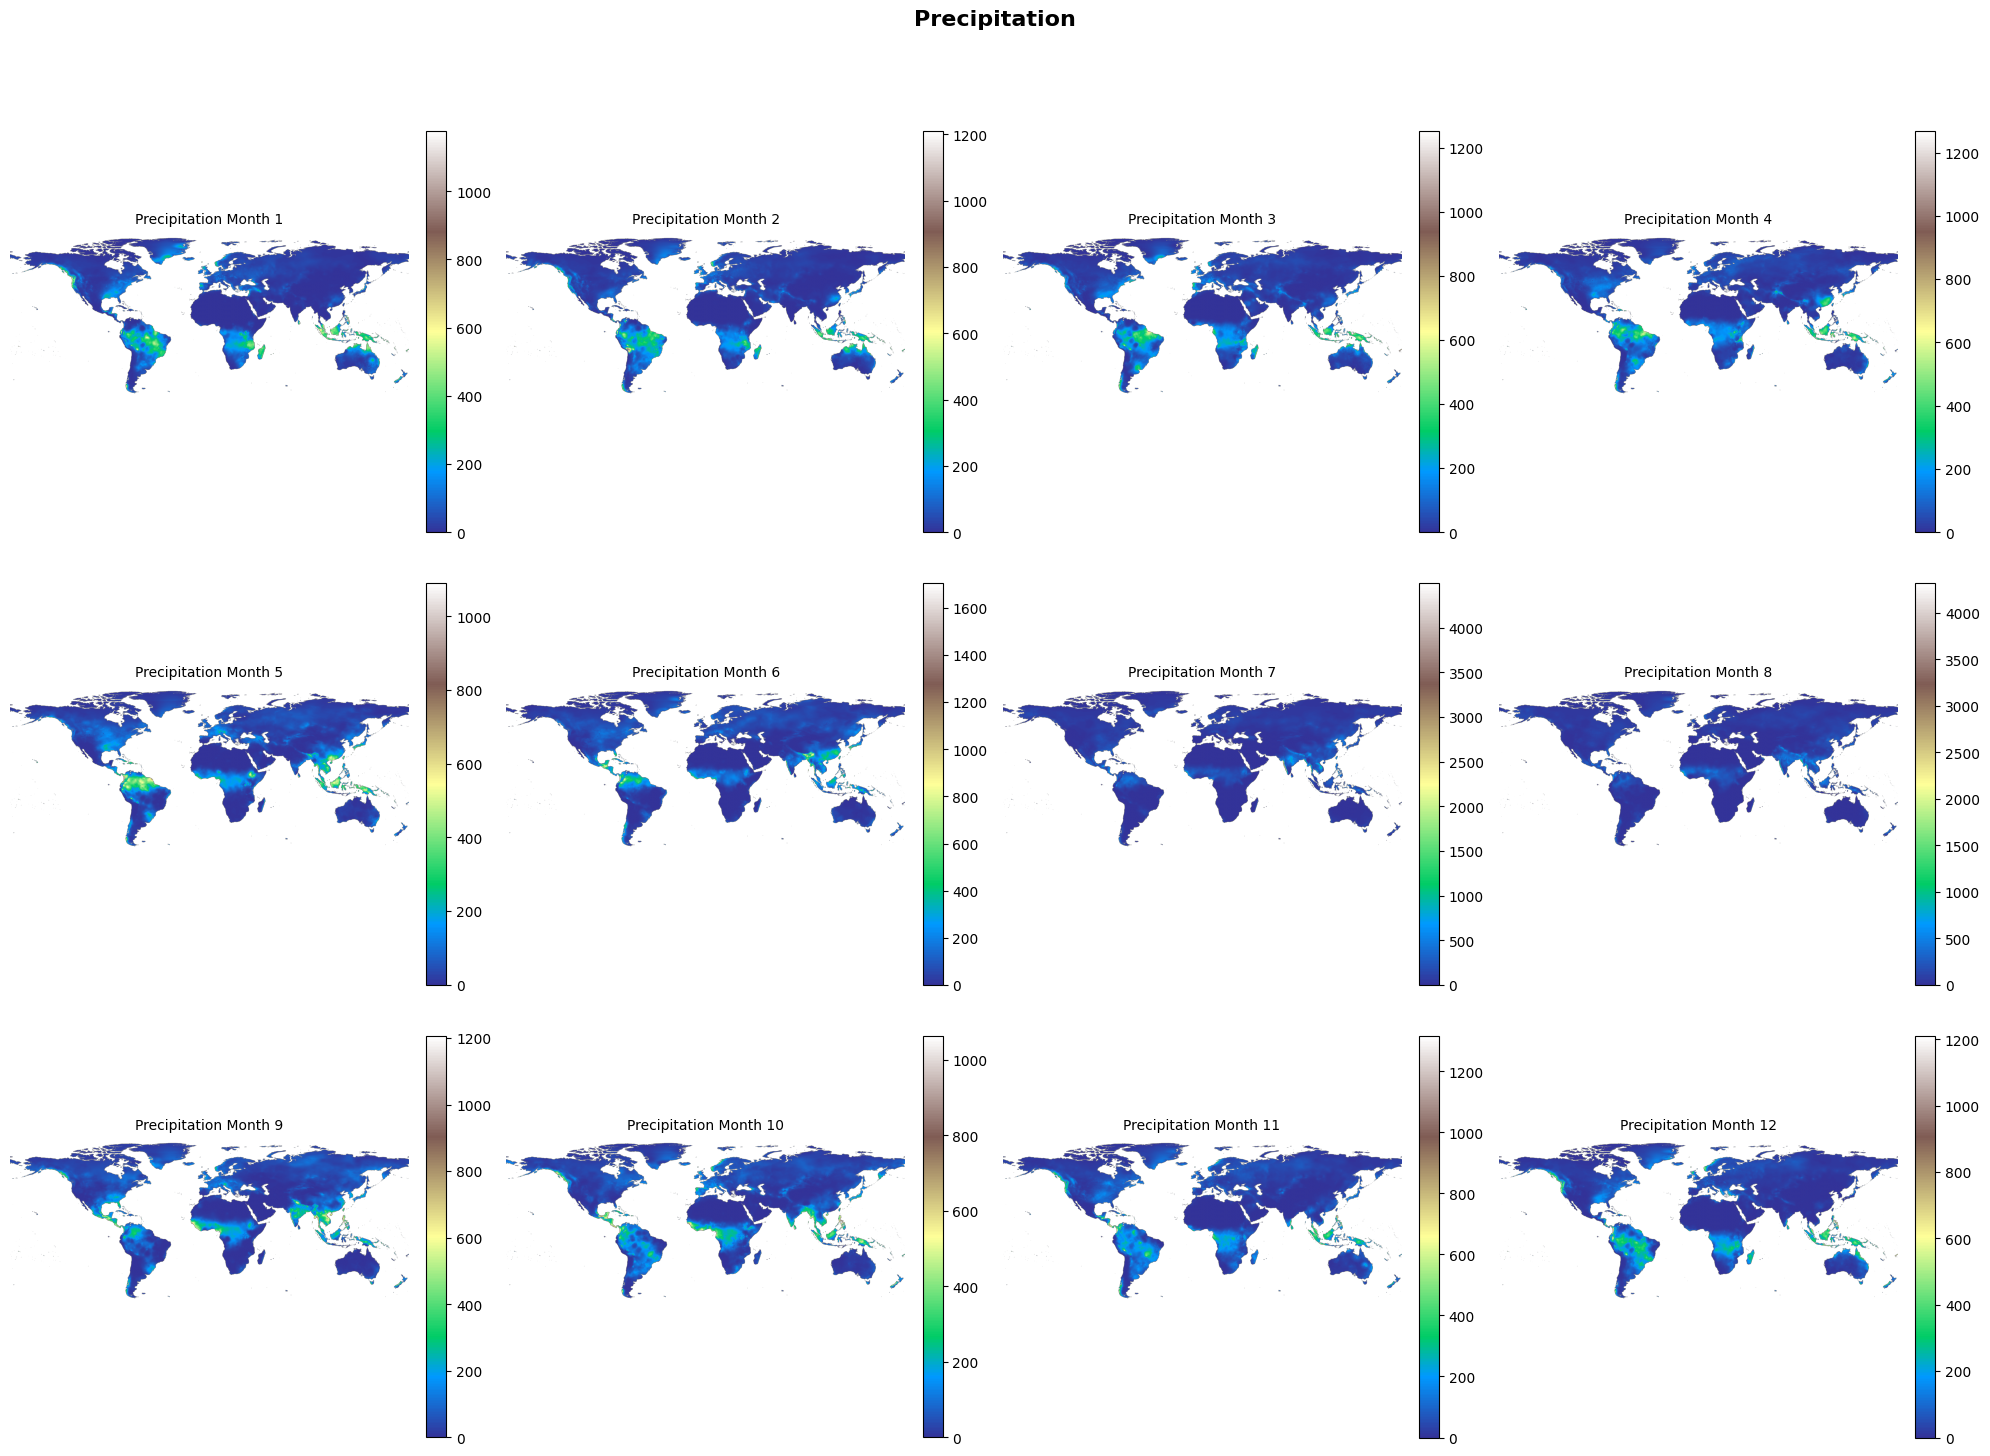

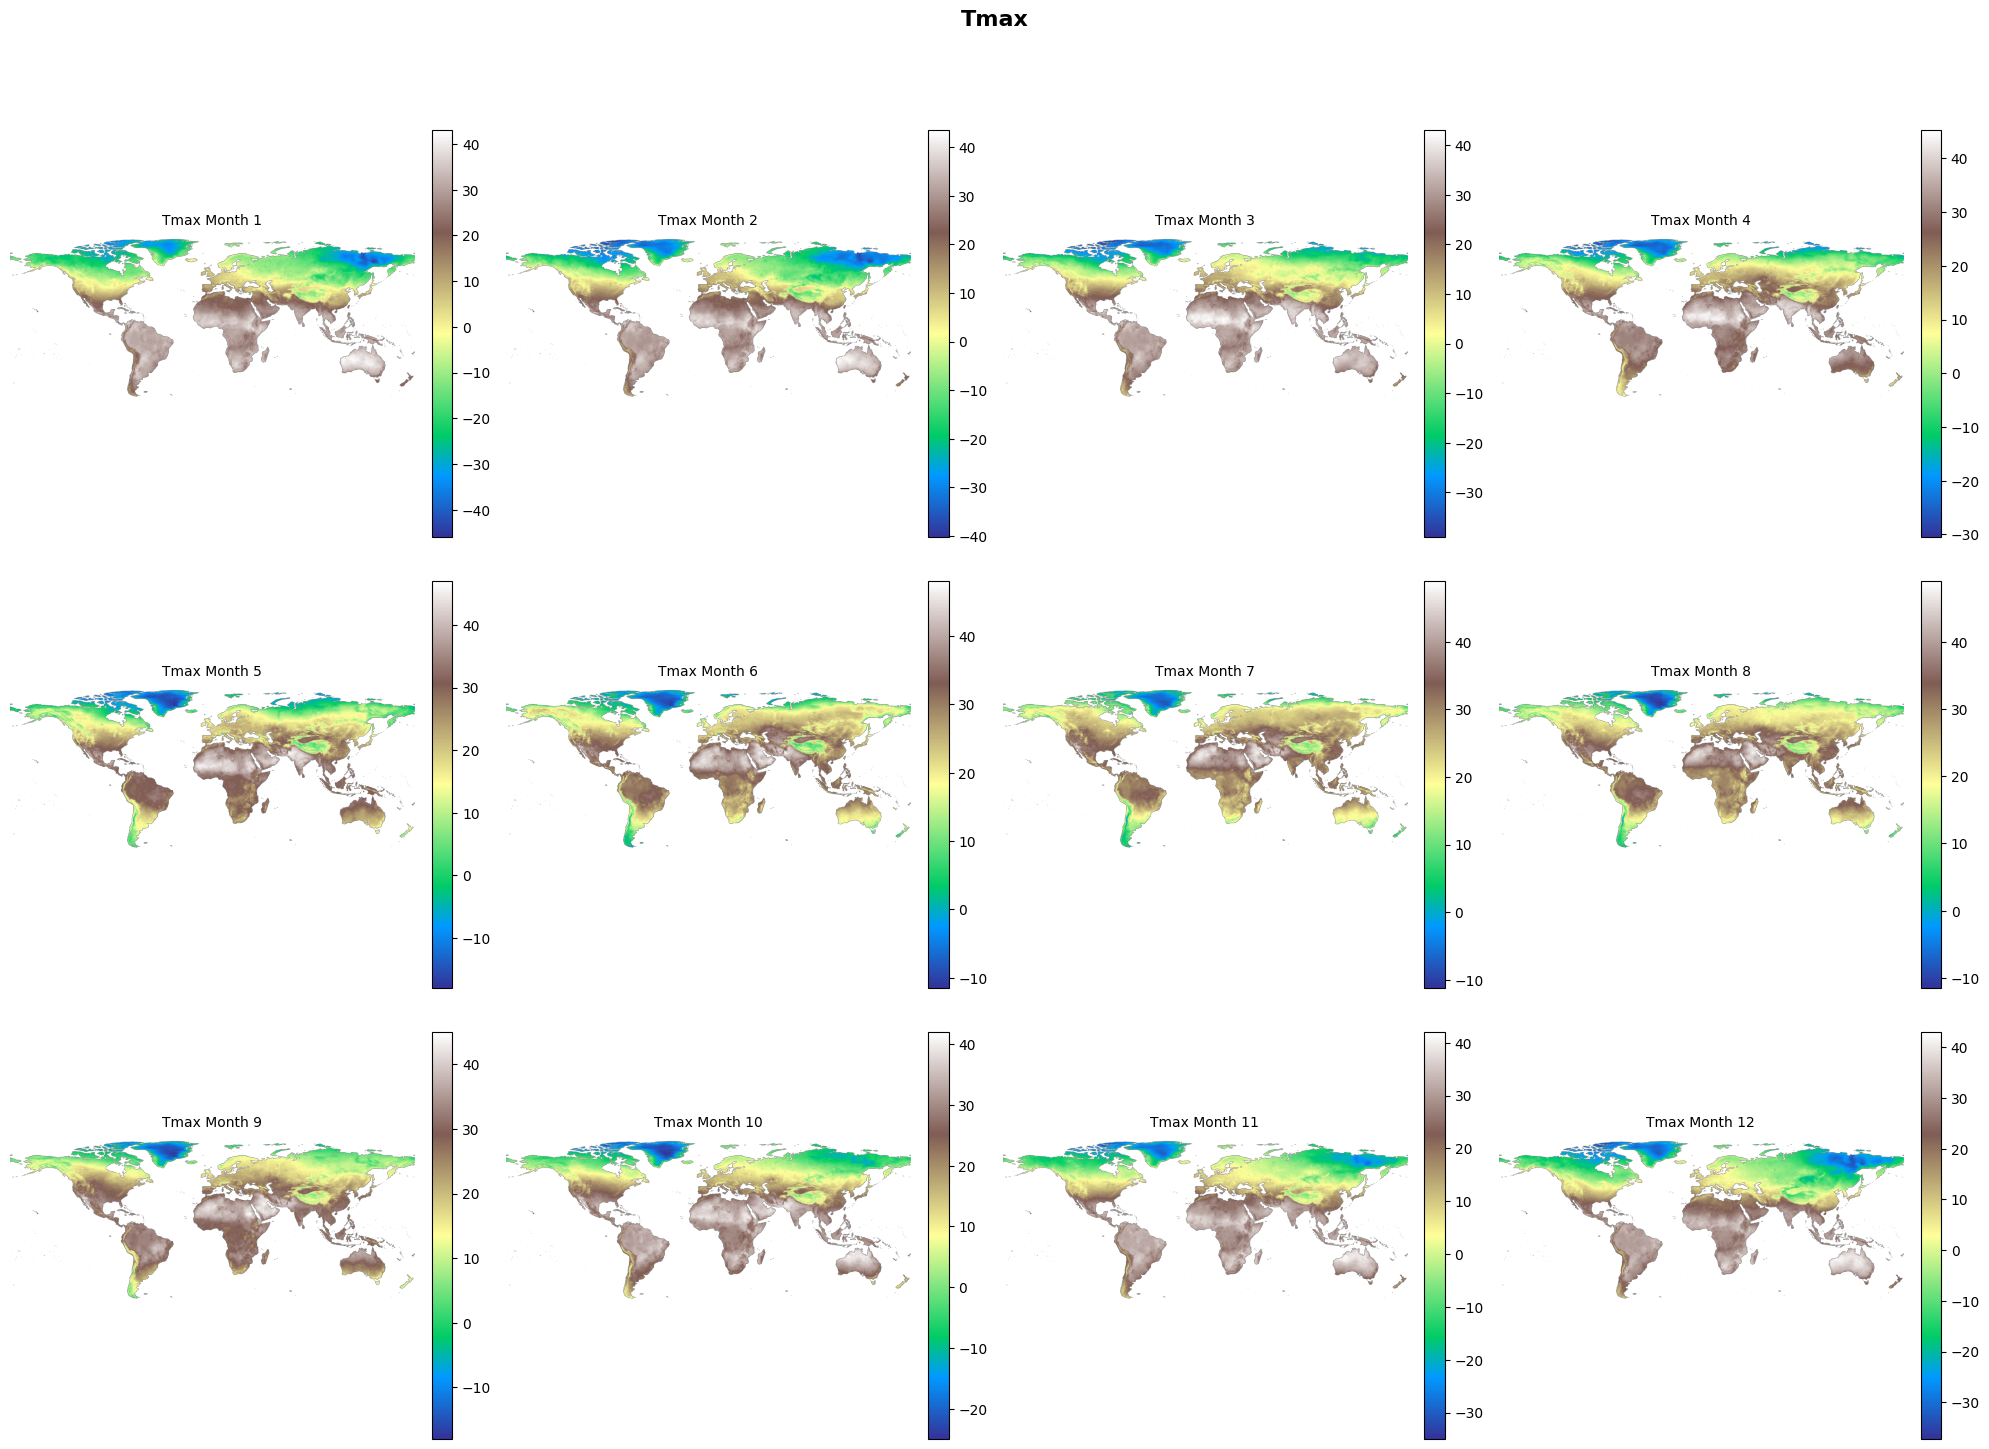

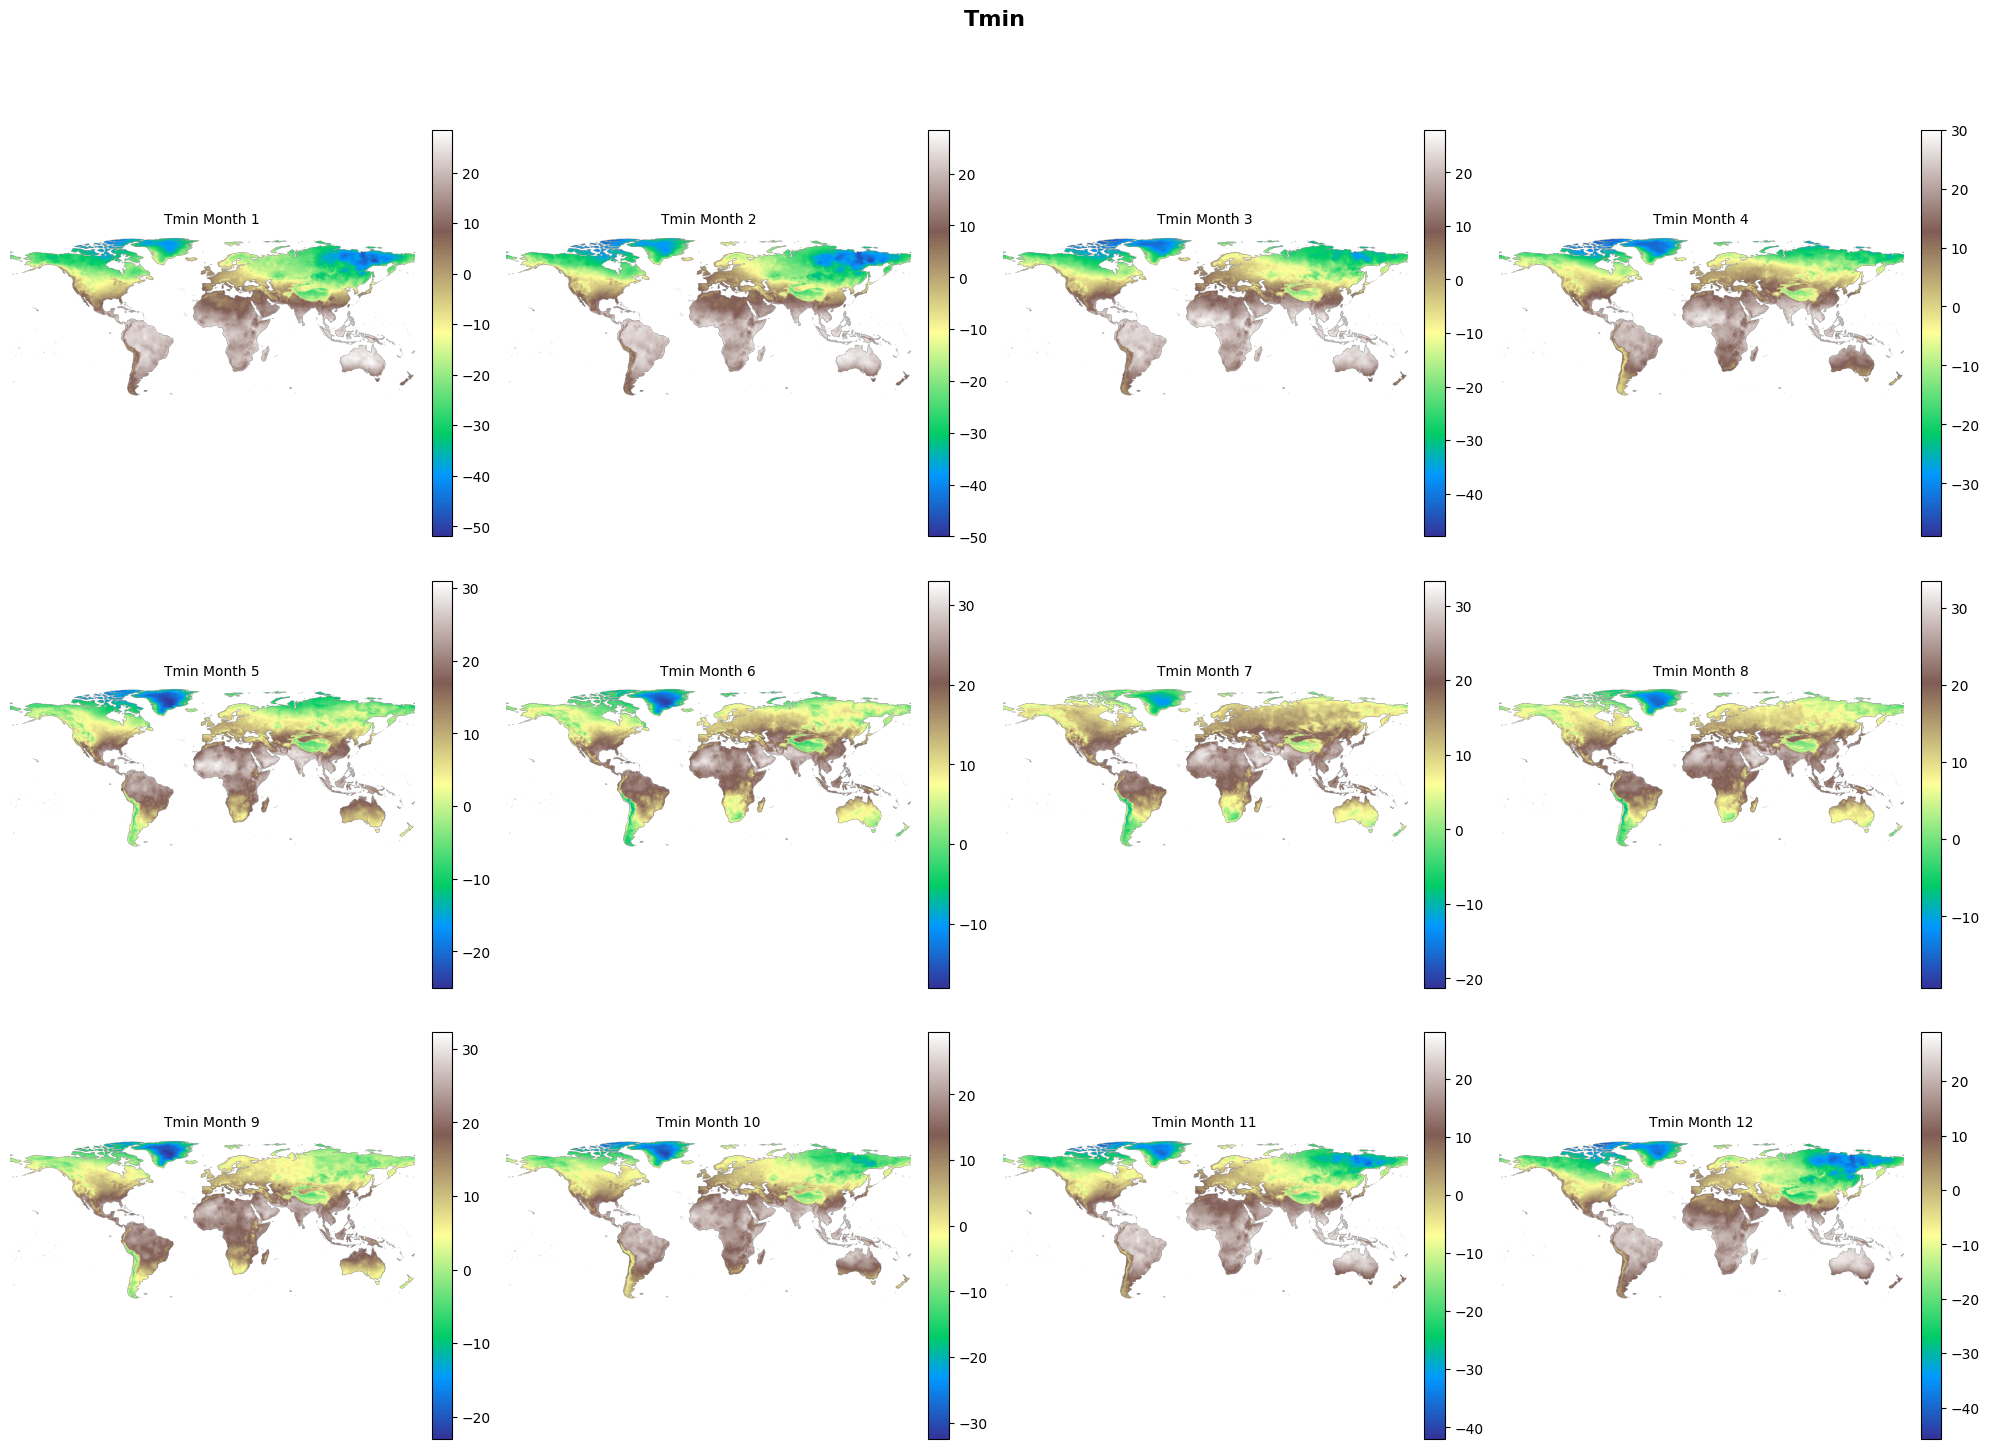

In [ ]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

prec_files = [
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_prec2024/wc2.1_cruts4.09_5m_prec_2024-01.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_prec2024/wc2.1_cruts4.09_5m_prec_2024-02.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_prec2024/wc2.1_cruts4.09_5m_prec_2024-03.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_prec2024/wc2.1_cruts4.09_5m_prec_2024-04.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_prec2024/wc2.1_cruts4.09_5m_prec_2024-05.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_prec2024/wc2.1_cruts4.09_5m_prec_2024-06.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_prec2024/wc2.1_cruts4.09_5m_prec_2024-07.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_prec2024/wc2.1_cruts4.09_5m_prec_2024-08.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_prec2024/wc2.1_cruts4.09_5m_prec_2024-09.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_prec2024/wc2.1_cruts4.09_5m_prec_2024-10.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_prec2024/wc2.1_cruts4.09_5m_prec_2024-11.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_prec2024/wc2.1_cruts4.09_5m_prec_2024-12.tif",

]

tmax_files = [
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmax2024/wc2.1_cruts4.09_5m_tmax_2024-01.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmax2024/wc2.1_cruts4.09_5m_tmax_2024-02.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmax2024/wc2.1_cruts4.09_5m_tmax_2024-03.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmax2024/wc2.1_cruts4.09_5m_tmax_2024-04.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmax2024/wc2.1_cruts4.09_5m_tmax_2024-05.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmax2024/wc2.1_cruts4.09_5m_tmax_2024-06.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmax2024/wc2.1_cruts4.09_5m_tmax_2024-07.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmax2024/wc2.1_cruts4.09_5m_tmax_2024-08.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmax2024/wc2.1_cruts4.09_5m_tmax_2024-09.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmax2024/wc2.1_cruts4.09_5m_tmax_2024-10.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmax2024/wc2.1_cruts4.09_5m_tmax_2024-11.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmax2024/wc2.1_cruts4.09_5m_tmax_2024-12.tif",
]

tmin_files = [
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmin2024/wc2.1_cruts4.09_5m_tmin_2024-01.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmin2024/wc2.1_cruts4.09_5m_tmin_2024-02.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmin2024/wc2.1_cruts4.09_5m_tmin_2024-03.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmin2024/wc2.1_cruts4.09_5m_tmin_2024-04.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmin2024/wc2.1_cruts4.09_5m_tmin_2024-05.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmin2024/wc2.1_cruts4.09_5m_tmin_2024-06.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmin2024/wc2.1_cruts4.09_5m_tmin_2024-07.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmin2024/wc2.1_cruts4.09_5m_tmin_2024-08.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmin2024/wc2.1_cruts4.09_5m_tmin_2024-09.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmin2024/wc2.1_cruts4.09_5m_tmin_2024-10.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmin2024/wc2.1_cruts4.09_5m_tmin_2024-11.tif",
    "/content/drive/MyDrive/data_set/climate/wc2.1_cruts4.09_5m_tmin2024/wc2.1_cruts4.09_5m_tmin_2024-12.tif",
]


climate_data = {
    "Precipitation": prec_files,
    "Tmax": tmax_files,
    "Tmin": tmin_files
}

# Loop over each variable
for var_name, file_list in climate_data.items():
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    for i, tif in enumerate(file_list):
        with rasterio.open(tif) as src:
            data = src.read(1)
            data = np.ma.masked_equal(data, src.nodata)  # mask nodata
        ax = axes[i//4, i%4]
        img = ax.imshow(data, cmap='terrain')
        ax.set_title(f"{var_name} Month {i+1}", fontsize=10)
        ax.set_axis_off()
        fig.colorbar(img, ax=ax, fraction=0.046, pad=0.04)  # add colorbar to each subplot

    plt.suptitle(var_name, fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()